# List of Exercises 1 - Exercise 10

*Student: Luigi Lucas de Carvalho Silva / luigi.lcsilva@gmail.com*

First of all, let us import some useful packages.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import scipy.integrate as integrate
import scipy.special as special
import scipy.interpolate as interpolate
import scipy.stats as stats

Defining the gaussian distribution.

In [2]:
### Gaussian distribution definition.
def gaussian(x, mu, sigma):
    g = (1/(np.sqrt(2*np.pi)*sigma))*np.exp(-(x-mu)**2/(2*sigma**2)) 
    return g

## Exercise 10 - Letter a)

Let us generate uniform random numbers and compute the new variable $z_i$.

For the new variable to be $z_i = \sum_{j=1}^{L} \frac{x_i^j}{L}$, we must divide the cumsum of the random numbers arrays by the number of arrays summed.

In [3]:
### Let us begin with some common parameters.
z_list_number = [1, 2, 8, 16, 64, 1024, 2048]  ### I added some values here.
each_sample_size = 1000                        ### I changed the size of each sample.

L_max_number = max(z_list_number)

### For each number in total_number, we will generate uniform samples of size 100.
total_number = np.arange(1, L_max_number+1, 1)

### These are lists for saving the random samples, the random samples cumsum and the new variable z_var, 
### defined as the random_unif_cumsum/L, where L is how many variables we are summing.
random_unif = []
random_unif_cumsum = []
random_z = []

### Let us generate the random numbers and compute the new variable.
x_unif_cumsum = 0
for i in total_number:
    ### Uniform random numbers ###
    np.random.seed(seed=i) # Seed
    x_unif = np.random.random_sample(size=each_sample_size)
    
    ### Defining the cumulative sum for each time.
    x_unif_cumsum = x_unif_cumsum + x_unif
    
    ### Defining the new variable z_var, for each time (the "time" here corresponds to our "L").
    z_var = x_unif_cumsum/i
    
    ### Saving each sample of size 100 in a list.
    random_unif.append(x_unif)
    ### Saving the cumsum of the samples in a list.
    random_unif_cumsum.append(x_unif_cumsum)
    ### Saving the new variable z in a list.
    random_z.append(z_var)

Here, I will just get the z variables accordingly to the exercise statement.

In [4]:
z_list = []

for L in z_list_number:
    num = L-1
    z_L = random_z[num]
    z_list.append(z_L)

Now, let us bin the values and make the histograms.

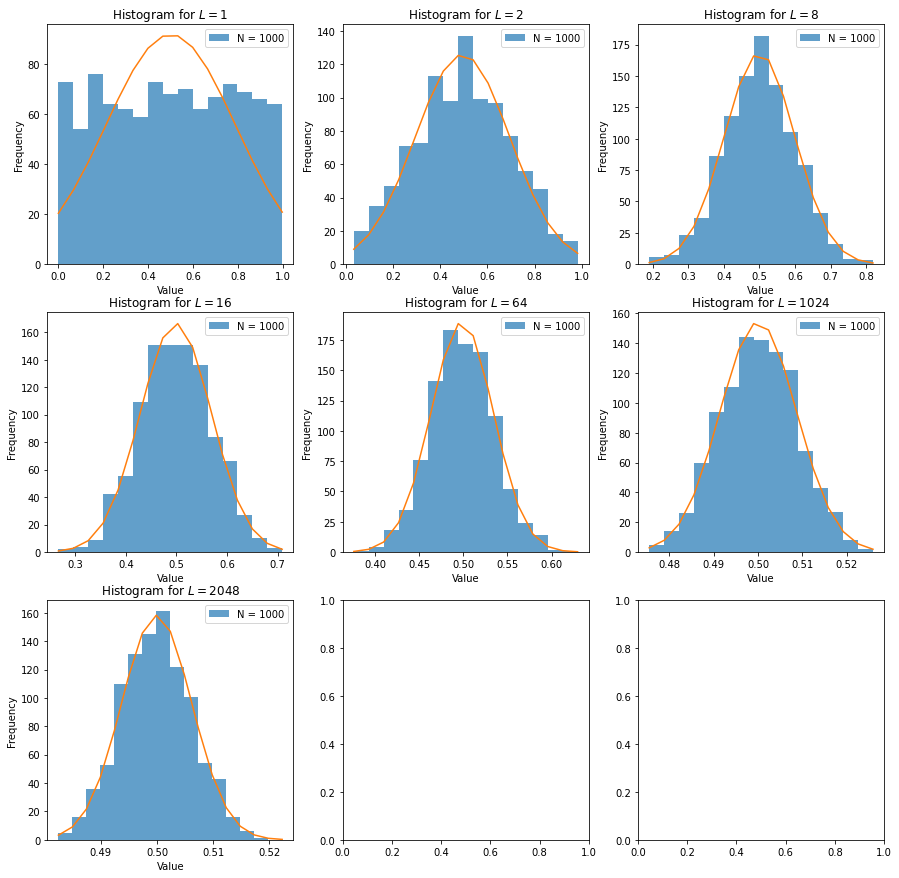

In [5]:
### Parameters for the plot.
col_quantity = 3

if len(z_list)//col_quantity == len(z_list)/col_quantity:
    lines_quantity = len(z_list)//col_quantity
else:
    lines_quantity = len(z_list)//col_quantity + 1
    
size_param = 15/col_quantity
figure, axis = plt.subplots(lines_quantity, col_quantity,
                            figsize=(size_param*col_quantity,size_param*lines_quantity))

### Making the plots.
j=0
for z in z_list:
    ### Defining the bins.
    number_of_bins = 15
    step = (max(z) - min(z))/number_of_bins
    all_bins = np.arange(min(z), max(z)+step, step)
    
    ### Parameters for the gaussian.
    mu_gauss = np.mean(z)
    sigma_gauss = np.std(z)
    resc_factor_gauss = step*each_sample_size
    
    ### Plotting graphs
    coord_1 = j//col_quantity
    coord_2 = j%col_quantity
    axis[coord_1, coord_2].hist(z, alpha=0.7, bins=all_bins, label='N = %.f' % each_sample_size)
    axis[coord_1, coord_2].plot(all_bins, gaussian(all_bins, mu_gauss, sigma_gauss)*resc_factor_gauss)
    axis[coord_1, coord_2].set_xlabel('Value')
    axis[coord_1, coord_2].set_ylabel('Frequency')
    axis[coord_1, coord_2].set_title('Histogram for $L = %.f$' % z_list_number[j])
    axis[coord_1, coord_2].legend()
    
    j+=1

Note that the variance is getting smaller (the values in the x-axis are being constrained to a smaller interval for each L).

## Exercise 10 - Letter b)

Let us generate 1-D gaussian random numbers and compute the new variable $z_i$.

In [6]:
### Let us begin with some common parameters.
z_list_number = [1, 2, 8, 16, 64, 1024, 2048]  ### I added some values here.
each_sample_size = 1000                        ### I changed the size of each sample.

L_max_number = max(z_list_number)

### For each number in total_number, we will generate 1-D gaussian samples of size each_sample_size.
total_number = np.arange(1, L_max_number+1, 1)

### These are lists for saving the random samples, the random samples cumsum and the new variable z_var, 
### defined as the random_unif_cumsum/L, where L is how many variables we are summing.
random_gauss = []
random_gauss_cumsum = []
random_gauss_z = []

### Let us generate the random numbers and compute the new variable.
x_gauss_cumsum = 0
for i in total_number:
    ### Uniform random numbers ###
    np.random.seed(seed=i) # Seed
    x_gauss = np.random.normal(loc=0.0, scale=1.0, size=each_sample_size)
    
    ### Defining the cumulative sum for each time.
    x_gauss_cumsum = x_gauss_cumsum + x_gauss
    
    ### Defining the new variable z_var, for each time (the "time" here corresponds to our "L").
    z_var_gauss = x_gauss_cumsum/i
    
    ### Saving each sample of size 100 in a list.
    random_gauss.append(x_gauss)
    ### Saving the cumsum of the samples in a list.
    random_gauss_cumsum.append(x_gauss_cumsum)
    ### Saving the new variable z in a list.
    random_gauss_z.append(z_var_gauss)

Here, I will just get the z variables accordingly to the exercise statement.

In [7]:
z_list_gauss = []

for L in z_list_number:
    num = L-1
    z_L_gauss = random_gauss_z[num]
    z_list_gauss.append(z_L_gauss)

Now, let us bin the values and make the histograms.

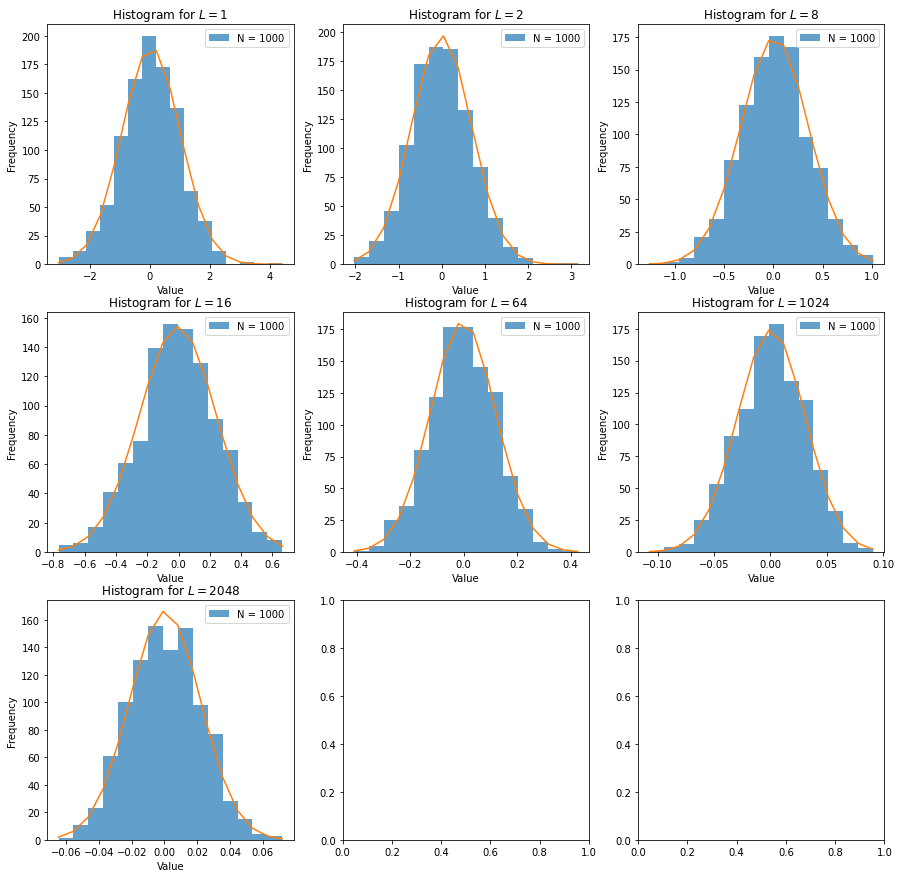

In [8]:
### Parameters for the plot.
col_quantity = 3

if len(z_list_gauss)//col_quantity == len(z_list_gauss)/col_quantity:
    lines_quantity = len(z_list_gauss)//col_quantity
else:
    lines_quantity = len(z_list_gauss)//col_quantity + 1
    
size_param = 15/col_quantity
figure, axis = plt.subplots(lines_quantity, col_quantity,
                            figsize=(size_param*col_quantity,size_param*lines_quantity))

### Making the plots.
j=0
for z in z_list_gauss:
    ### Defining the bins.
    number_of_bins = 15
    step = (max(z) - min(z))/number_of_bins
    all_bins = np.arange(min(z), max(z)+step, step)
    
    ### Parameters for the gaussian.
    mu_gauss = np.mean(z)
    sigma_gauss = np.std(z)
    resc_factor_gauss = step*each_sample_size
    
    ### Plotting graphs
    coord_1 = j//col_quantity
    coord_2 = j%col_quantity
    axis[coord_1, coord_2].hist(z, alpha=0.7, bins=all_bins, label='N = %.f' % each_sample_size)
    axis[coord_1, coord_2].plot(all_bins, gaussian(all_bins, mu_gauss, sigma_gauss)*resc_factor_gauss)
    axis[coord_1, coord_2].set_xlabel('Value')
    axis[coord_1, coord_2].set_ylabel('Frequency')
    axis[coord_1, coord_2].set_title('Histogram for $L = %.f$' % z_list_number[j])
    axis[coord_1, coord_2].legend()
    
    j+=1

Again, we can see that the variance is becoming smaller.

## Exercise 10 - Letter c)

Let us generate 2-D gaussian random numbers and compute the new variable $z_i$. My $x_i$ here, which is contained in the definition of $z_i$, will be the sum of the x and y random numbers generated in the 2-D gaussian, that is, $x_i = x_{2D} + y_{2D}$.

In [9]:
### Let us begin with some common parameters.
z_list_number = [1, 2, 8, 16, 64, 1024, 2048]  ### I added some values here.
each_sample_size = 1000                        ### I changed the size of each sample.

L_max_number = max(z_list_number)

### For each number in total_number, we will generate 2-D gaussian samples of size each_sample_size.
total_number = np.arange(1, L_max_number+1, 1)

### These are lists for saving the random samples, the random samples cumsum and the new variable z_var, 
### defined as the random_unif_cumsum/L, where L is how many variables we are summing.
random_mgauss = []
random_mgauss_cumsum = []
random_mgauss_z = []

### Bivariate gaussian parameters.
mean_x = 0
mean_y = 1
sig_x = 1
sig_y = 2
corr_param = 0

### Bivariate gaussian mean array and covariance matrix.
mean_mgauss = np.array([mean_x, mean_y])
cov_mgauss = np.array([[sig_x**2, corr_param*sig_x*sig_y], [corr_param*sig_x*sig_y, sig_y**2]])

### Let us generate the random numbers and compute the new variable.
x_i_mgauss_cumsum = 0
for i in total_number:
    ### Uniform random numbers ###
    np.random.seed(seed=i) # Seed
    xy_mgauss = np.random.multivariate_normal(mean_mgauss, cov_mgauss, size=each_sample_size)
    
    x_i_mgauss = xy_mgauss[:, 0] + xy_mgauss[:, 1]
    ### Defining the cumulative sum for each time.
    x_i_mgauss_cumsum = x_i_mgauss_cumsum + x_i_mgauss
    
    ### Defining the new variable z_var, for each time (the "time" here corresponds to our "L").
    z_var_mgauss = x_i_mgauss_cumsum/i
    
    ### Saving each sample of size 100 in a list.
    random_mgauss.append(x_i_mgauss)
    ### Saving the cumsum of the samples in a list.
    random_mgauss_cumsum.append(x_i_mgauss_cumsum)
    ### Saving the new variable z in a list.
    random_mgauss_z.append(z_var_mgauss)

Here, I will just get the z variables accordingly to the exercise statement.

In [10]:
z_list_mgauss = []

for L in z_list_number:
    num = L-1
    z_L_mgauss = random_mgauss_z[num]
    z_list_mgauss.append(z_L_mgauss)

Now, let us bin the values and make the histograms.

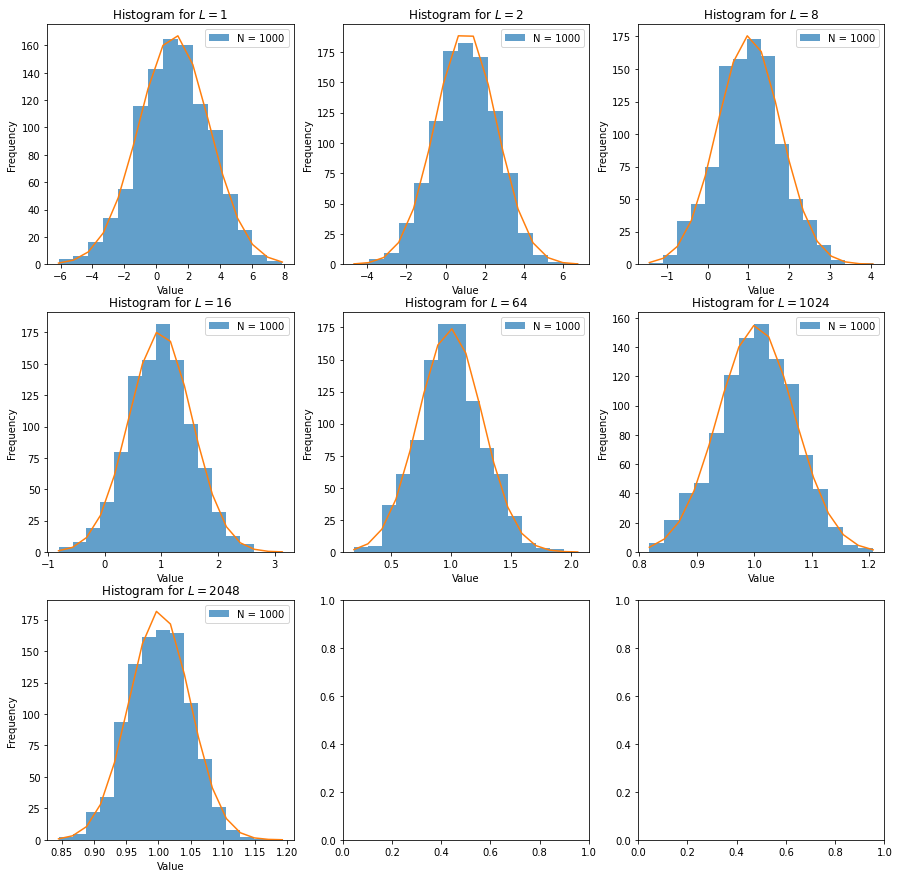

In [11]:
### Parameters for the plot.
col_quantity = 3

if len(z_list_mgauss)//col_quantity == len(z_list_mgauss)/col_quantity:
    lines_quantity = len(z_list_mgauss)//col_quantity
else:
    lines_quantity = len(z_list_mgauss)//col_quantity + 1
    
size_param = 15/col_quantity
figure, axis = plt.subplots(lines_quantity, col_quantity,
                            figsize=(size_param*col_quantity,size_param*lines_quantity))

### Making the plots.
j=0
for z in z_list_mgauss:
    ### Defining the bins.
    number_of_bins = 15
    step = (max(z) - min(z))/number_of_bins
    all_bins = np.arange(min(z), max(z)+step, step)
    
    ### Parameters for the gaussian.
    mu_gauss = np.mean(z)
    sigma_gauss = np.std(z)
    resc_factor_gauss = step*each_sample_size
    
    ### Plotting graphs
    coord_1 = j//col_quantity
    coord_2 = j%col_quantity
    axis[coord_1, coord_2].hist(z, alpha=0.7, bins=all_bins, label='N = %.f' % each_sample_size)
    axis[coord_1, coord_2].plot(all_bins, gaussian(all_bins, mu_gauss, sigma_gauss)*resc_factor_gauss)
    axis[coord_1, coord_2].set_xlabel('Value')
    axis[coord_1, coord_2].set_ylabel('Frequency')
    axis[coord_1, coord_2].set_title('Histogram for $L = %.f$' % z_list_number[j])
    axis[coord_1, coord_2].legend()
    
    j+=1

Again, we can see that the variance is becoming smaller.